# MousePseudopregnant processing 

## Biological caracteristics of the sample

Type of sampling : Dissection of the whole uterus - sequencing of uterine horn whitout endometrium dissection. 

Pseudopregnant Mouse 3.5 days post coitum. 


In [1]:
# LOAD LIBRARIES
suppressPackageStartupMessages(library(Seurat)) # v5
suppressPackageStartupMessages(library(SeuratData)) # v0.2.2
suppressPackageStartupMessages(library(SeuratDisk)) # v0.0.0.9020
suppressPackageStartupMessages(library(SeuratObject)) # v4.1.3
suppressPackageStartupMessages(library(tidyverse)) # v2.0.0
suppressPackageStartupMessages(library(ggpubr)) # v0.6.0
suppressPackageStartupMessages(library(reticulate)) 
suppressPackageStartupMessages(library(leiden)) 
library(Seurat) # v5
library(ggplot2) #
library(SoupX) #
library(DoubletFinder) #
library(SeuratDisk)
library(SeuratData)
library(SeuratObject)
library(dplyr)
library(optparse)


In [34]:
options(repr.plot.width=8, repr.plot.height=8)

In [35]:
# SET CUSTOM DISPLAY 
theme_custom = theme(plot.title = element_text(family = "Arial", 
                                               face="bold", 
                                               size = 20,
                                               margin = 20), 
                     axis.title = element_text(family = "Arial", 
                                               face ="plain",
                                               size = 20, 
                                               margin = 5),
                     axis.text = element_text(family = "Arial",
                                              face = "plain", 
                                              size = 15),
                     panel.border = element_rect(colour = "black", 
                                                 fill = NA, 
                                                 linetype = 1),
                     panel.background = element_rect(fill = "white"), plot.margin = margin(5,5,5,5))


In [36]:
# Set seed
myseed = 1212

In [37]:
# Load all saimiri samples and create Seurat objects
species = "MousePseudopregnant"

sobj_Mouse_PP01 = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/MousePseudopregnant_PP01_post_QC.rds"))
sobj_Mouse_PP02 = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/MousePseudopregnant_PP02_post_QC.rds"))
sobj_Mouse_PP03 = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/MousePseudopregnant_PP03_post_QC.rds"))


In [39]:
sobj

An object of class Seurat 
74760 features across 20551 samples within 2 assays 
Active assay: soupx (37380 features, 2000 variable features)
 10 layers present: counts.MousePseudopregnant_PP01, counts.MousePseudopregnant_PP02, counts.MousePseudopregnant_PP03, data.MousePseudopregnant_PP01, scale.data.MousePseudopregnant_PP01, data.MousePseudopregnant_PP02, scale.data.MousePseudopregnant_PP02, data.MousePseudopregnant_PP03, scale.data.MousePseudopregnant_PP03, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap.unintegrated, umap

In [38]:
ls()

[1] "a"               "b"               "c"               "metadata"       
 [5] "myseed"          "nPCs"            "sobj"            "sobj_Mouse_PP01"
 [9] "sobj_Mouse_PP02" "sobj_Mouse_PP03" "species"         "theme_custom"

## Overview of the steps 


## Merging the 3 seurat object for QC metrics outputs

In [7]:
# Create an unique Seurat object with all these samples 
sobj = merge(x = sobj_Mouse_PP01, 
                y = c(sobj_Mouse_PP02,sobj_Mouse_PP03), 
                merge.data = TRUE) # we can merge the object as we used before the same normalisation methods
sobj 

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


An object of class Seurat 
74760 features across 20551 samples within 2 assays 
Active assay: soupx (37380 features, 2000 variable features)
 9 layers present: counts.MousePseudopregnant_PP01, counts.MousePseudopregnant_PP02, counts.MousePseudopregnant_PP03, data.MousePseudopregnant_PP01, scale.data.MousePseudopregnant_PP01, data.MousePseudopregnant_PP02, scale.data.MousePseudopregnant_PP02, data.MousePseudopregnant_PP03, scale.data.MousePseudopregnant_PP03
 1 other assay present: RNA

The object postQC has been cleaned using standart threshold, and standart processing steps has been performed. 
The next step to do are : 
- choose PC to run the dimension reductions 
- find clustering parameters 
- looking at the QC metrics to check that the filtering has been done correctly
- do additional filtering if necessary
- save the object

## QC metrics overview

In [40]:
# Save the metadata 
metadata = sobj@meta.data

In [41]:
# Number of cells per sample
table(metadata$orig.ident)


MousePseudopregnant_PP01 MousePseudopregnant_PP02 MousePseudopregnant_PP03 
                    5565                     7886                     7100 

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript fon

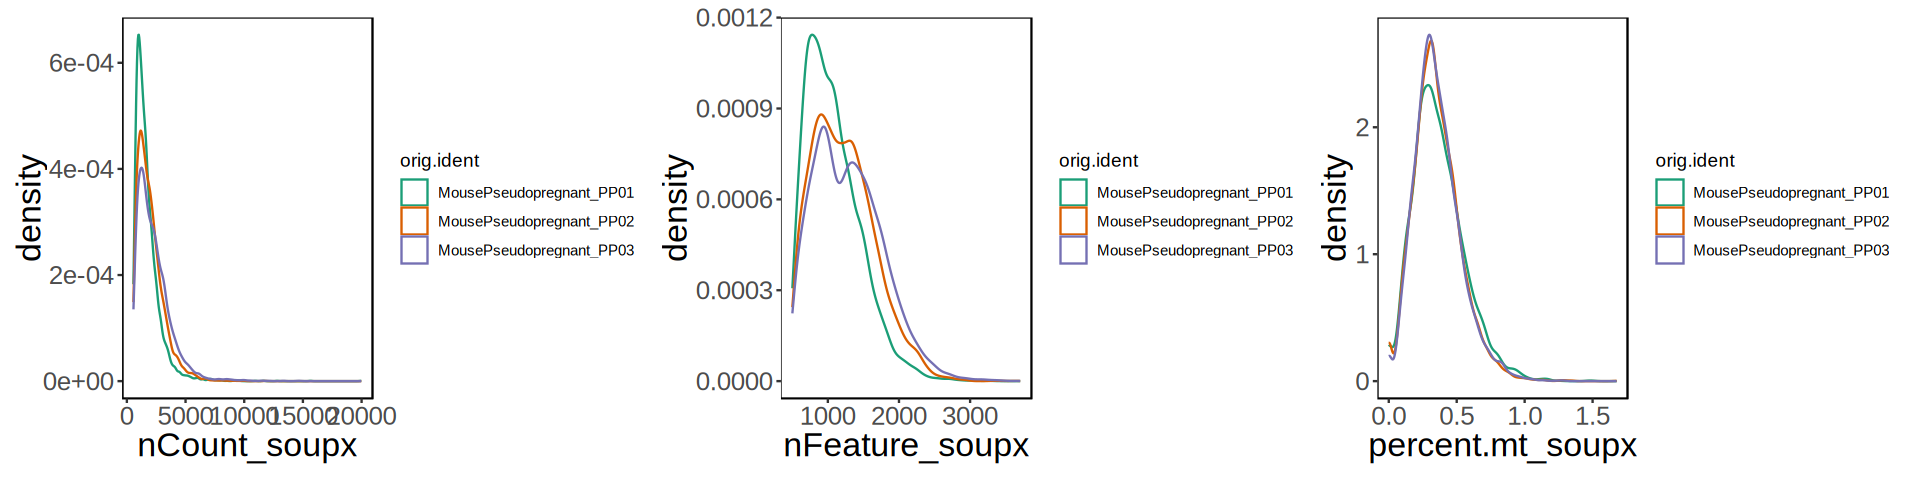

In [10]:
options(repr.plot.width=16, repr.plot.height=4)

# nCounts 
a = ggplot2::ggplot(metadata, aes(x=nCount_soupx, color = orig.ident)) +
  geom_density(alpha=0.6) + 
  scale_colour_brewer(palette = "Dark2") +
  theme_custom
# nFeatures 
b = ggplot2::ggplot(metadata, aes(x=nFeature_soupx, color = orig.ident)) +
  geom_density(alpha=0.6) +
  scale_colour_brewer(palette = "Dark2") +
  theme_custom 
c= ggplot2::ggplot(metadata, aes(x=percent.mt_soupx, color = orig.ident)) +
  geom_density(alpha=0.6) +
  scale_colour_brewer(palette = "Dark2") +
  theme_custom

a + b + c

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”


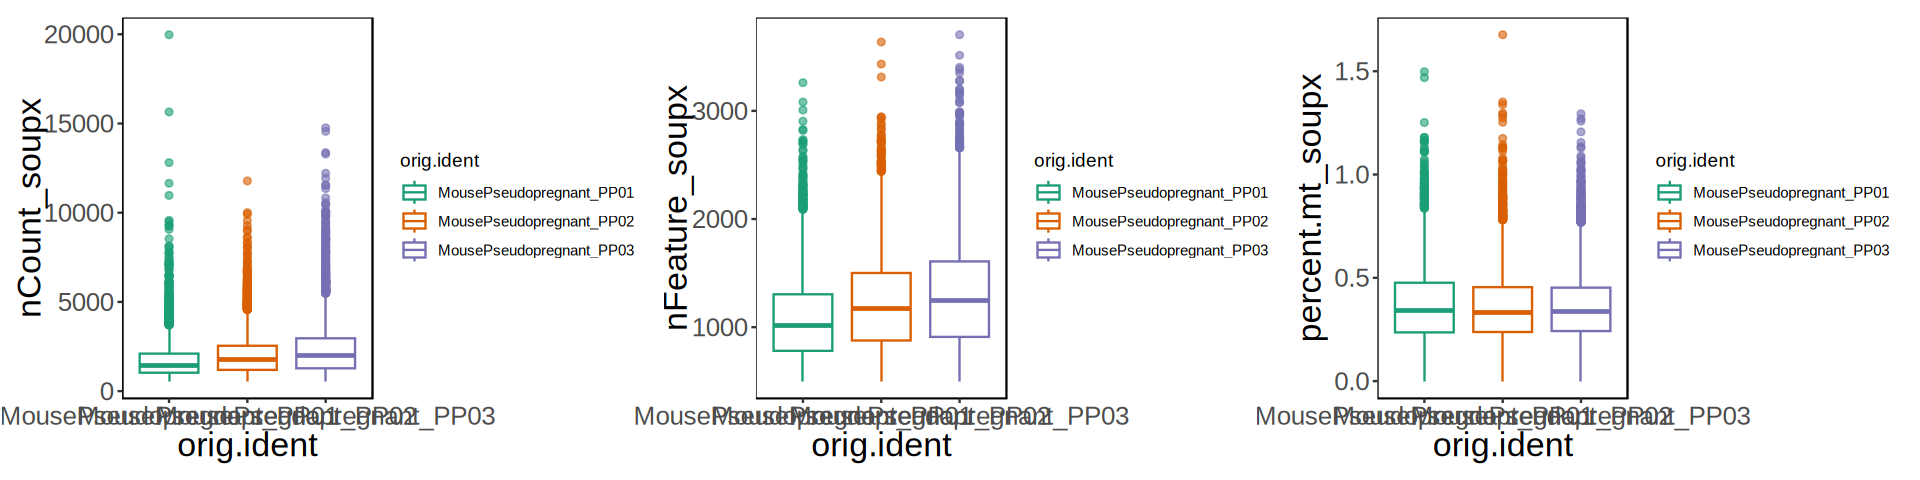

In [11]:
# nCounts 
a = ggplot2::ggplot(metadata, aes(x =orig.ident ,y=nCount_soupx, color = orig.ident)) +
  geom_boxplot(alpha=0.6) + 
  scale_colour_brewer(palette = "Dark2") +
  theme_custom
b = ggplot2::ggplot(metadata, aes(x =orig.ident ,y=nFeature_soupx, color = orig.ident)) +
  geom_boxplot(alpha=0.6) + 
  scale_colour_brewer(palette = "Dark2") +
  theme_custom
c = ggplot2::ggplot(metadata, aes(x =orig.ident ,y=percent.mt_soupx, color = orig.ident)) +
  geom_boxplot(alpha=0.6) + 
  scale_colour_brewer(palette = "Dark2") +
  theme_custom


a + b+ c

## Cluster the cells

In [12]:
# Split Seurat object by sample 
# sobj[["soupx"]] = split(sobj[["soupx"]], f = sobj$orig.ident)
sobj
# Set soupx as the default assay 
DefaultAssay(sobj) = "soupx"

An object of class Seurat 
74760 features across 20551 samples within 2 assays 
Active assay: soupx (37380 features, 2000 variable features)
 9 layers present: counts.MousePseudopregnant_PP01, counts.MousePseudopregnant_PP02, counts.MousePseudopregnant_PP03, data.MousePseudopregnant_PP01, scale.data.MousePseudopregnant_PP01, data.MousePseudopregnant_PP02, scale.data.MousePseudopregnant_PP02, data.MousePseudopregnant_PP03, scale.data.MousePseudopregnant_PP03
 1 other assay present: RNA

In [13]:
# Run the first step of the processing again 
sobj = NormalizeData(sobj)
sobj = FindVariableFeatures(sobj)
sobj = ScaleData(sobj)
sobj = RunPCA(sobj, seed.use = myseed)

Normalizing layer: counts.MousePseudopregnant_PP01

Normalizing layer: counts.MousePseudopregnant_PP02

Normalizing layer: counts.MousePseudopregnant_PP03

Finding variable features for layer counts.MousePseudopregnant_PP01

Finding variable features for layer counts.MousePseudopregnant_PP02

Finding variable features for layer counts.MousePseudopregnant_PP03

Centering and scaling data matrix

PC_ 1 
Positive:  Ebf1, Tenm3, Rad51b, Cdh11, Arhgap6, Lama2, Kcnd2, Pcsk5, Gpc6, Aff3 
	   Pcdh7, Adam12, Ank2, Magi2, Gm29683, Ppfia2, Lsamp, Dlc1, Synpo2, Spon1 
	   Ripor2, Creb5, Rorb, Bnc2, Zeb2, Slc4a4, Pdzrn3, Gria4, Robo2, Nlgn1 
Negative:  Mecom, Itpr2, Plekhs1, Cobl, Rnf128, Sorl1, Mme, Chdh, Il17rb, Nav2 
	   Slc25a48, Jak2, Mob3b, Pcx, Far2os1, Rmst, Lrp2, Pla2g10os, Ap1s3, Mab21l3 
	   Casz1, Cdcp1, Patj, Lpar3, Jam2, Wwc1, Anpep, Stx18, Pax2, Adipor2 
PC_ 2 
Positive:  Sorbs2, Dock4, Fli1, Prkch, Cyyr1, Egfl7, Prkg1, Pecam1, Plxna4, Ryr3 
	   D5Ertd615e, Ptprb, Shank3, Nfib, Fgd5,

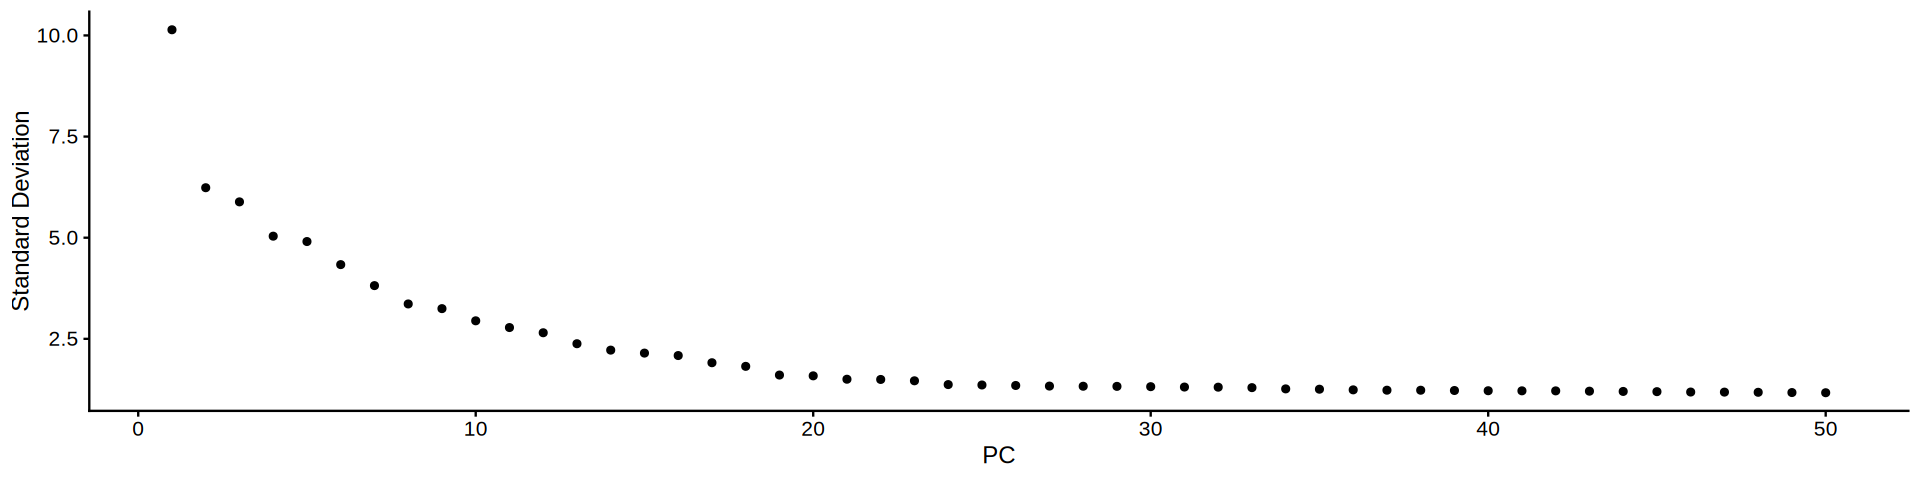

In [14]:
# Find correct PC 
ElbowPlot(sobj, ndims = 50, reduction = "pca")

In [15]:
# Set nPC to use 
nPCs = 20

In [16]:
# Identify nearest neighbors
sobj = FindNeighbors(sobj, dims = 1:nPCs,)

Computing nearest neighbor graph

Computing SNN



In [17]:
# Clustering - Leiden 
sobj = FindClusters(sobj, resolution = c(0.2,0.5,0.8), algorithm = 4)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.1 GiB”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to intege

Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by c

Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.1 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.1 GiB”


In [18]:
# Clustering - Louvain 
sobj = FindClusters(sobj, 
                    resolution = c(0.2,0.3,0.4,0.5), 
                    algorithm = 1, 
#                     cluster.name = "unintegrated_clusters", 
                    random.seed = myseed)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20551
Number of edges: 761066

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9607
Number of communities: 12
Elapsed time: 4 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20551
Number of edges: 761066

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9484
Number of communities: 14
Elapsed time: 3 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20551
Number of edges: 761066

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9373
Number of communities: 15
Elapsed time: 3 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20551
Number of edges: 761066

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9270
Number of communities: 17
Elapsed time: 3 seconds


## Dimensionality reduction 

In [19]:
# Run UMAP using Leiden algorythm
sobj = RunUMAP(sobj, dims = 1:20, reduction = "pca", reduction.name = "umap.unintegrated")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:23:52 UMAP embedding parameters a = 0.9922 b = 1.112

18:23:52 Read 20551 rows and found 20 numeric columns

18:23:52 Using Annoy for neighbor search, n_neighbors = 30

18:23:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:23:55 Writing NN index file to temp file /local/scratch/tmp/RtmpUwHhjd/file2d654029f52b3b

18:23:55 Searching Annoy index using 1 thread, search_k = 3000

18:24:03 Annoy recall = 100%

18:24:14 Commencing smooth kNN distance calibration using 1 thread
 with tar

Warning message:
“The following requested variables were not found: unintegrated_clusters”


[[1]]


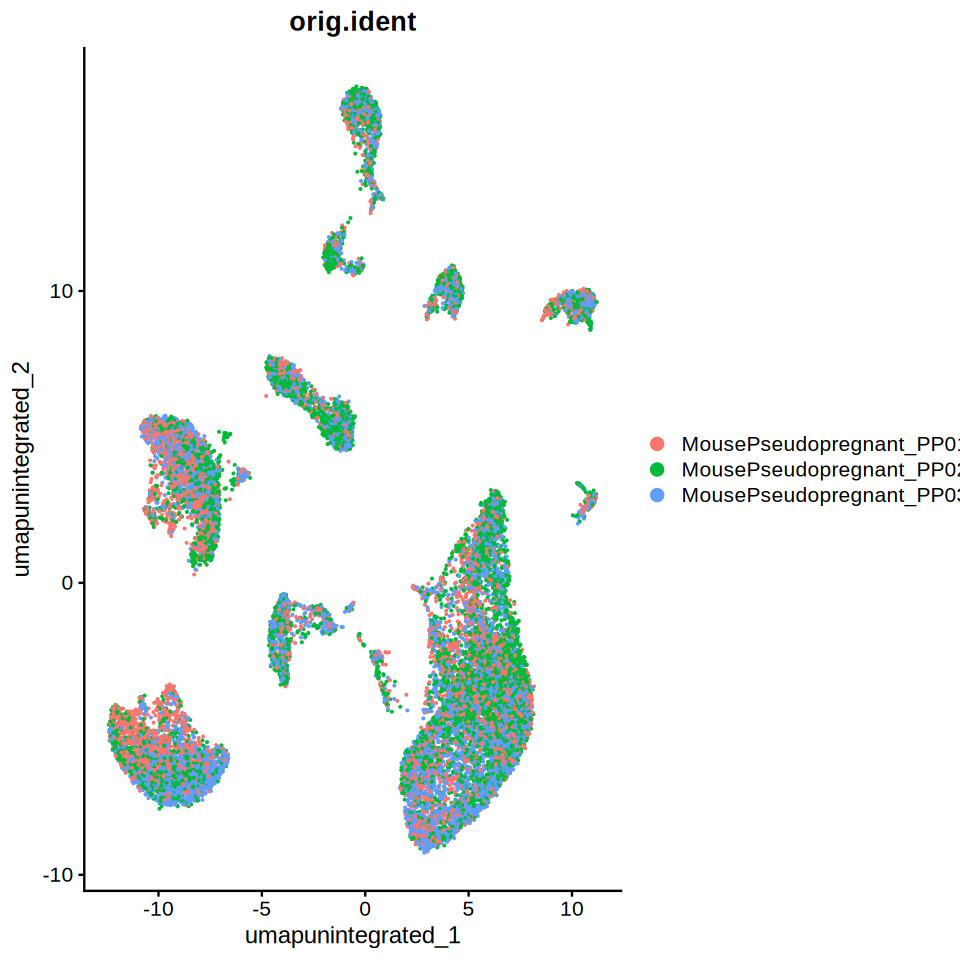

In [20]:
options(repr.plot.width=8, repr.plot.height=8)

# Look at the cluster without integration 
DimPlot(sobj, shuffle = T,
        reduction = "umap.unintegrated",
        group.by = c("unintegrated_clusters", "orig.ident"), combine = FALSE,)

In [21]:
table(sobj$orig.ident)


MousePseudopregnant_PP01 MousePseudopregnant_PP02 MousePseudopregnant_PP03 
                    5565                     7886                     7100 

Warning message:
“The following requested variables were not found: percent.rb_soupx”


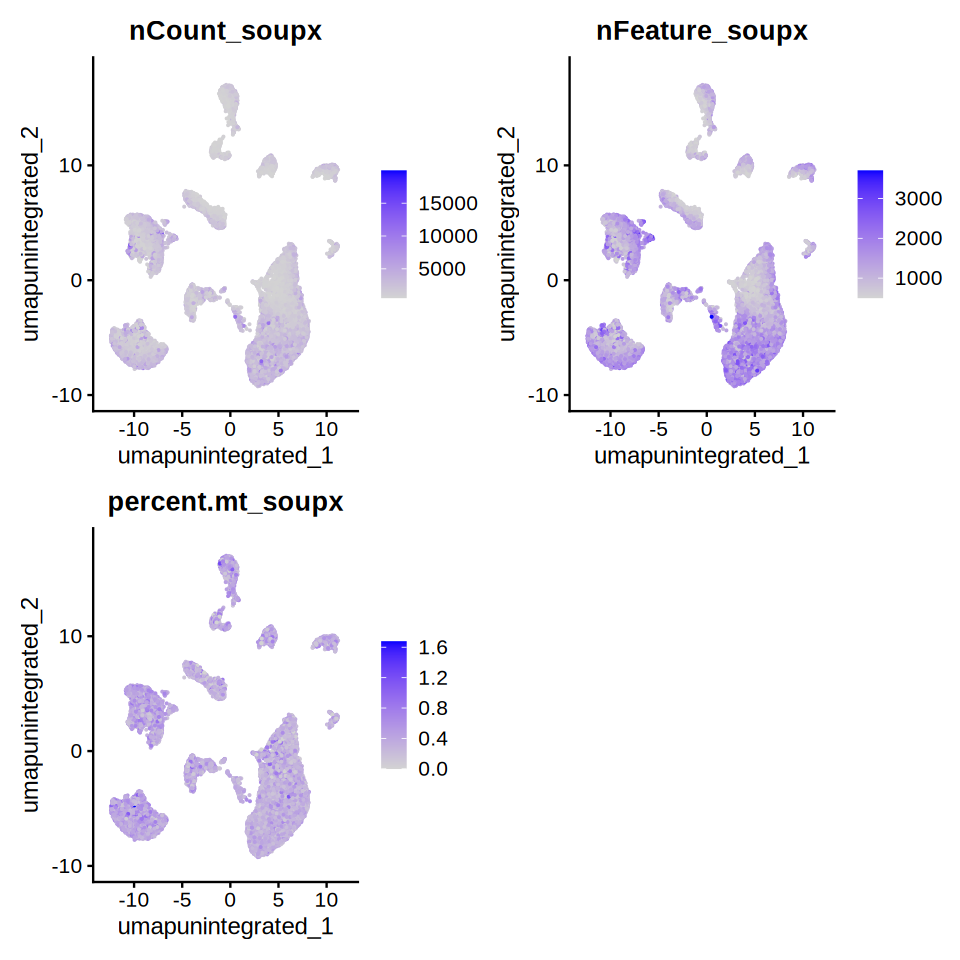

In [22]:
# Looking at the expression of MT and Ribo genes in the filtered dataset 
FeaturePlot(sobj, reduction = "umap.unintegrated", features = c("nCount_soupx", "nFeature_soupx","percent.mt_soupx", "percent.rb_soupx"))


In [23]:
table(sobj$percent.mt_soupx>2)


FALSE 
20551 

Picking joint bandwidth of 202

Picking joint bandwidth of 86

Picking joint bandwidth of 0.038



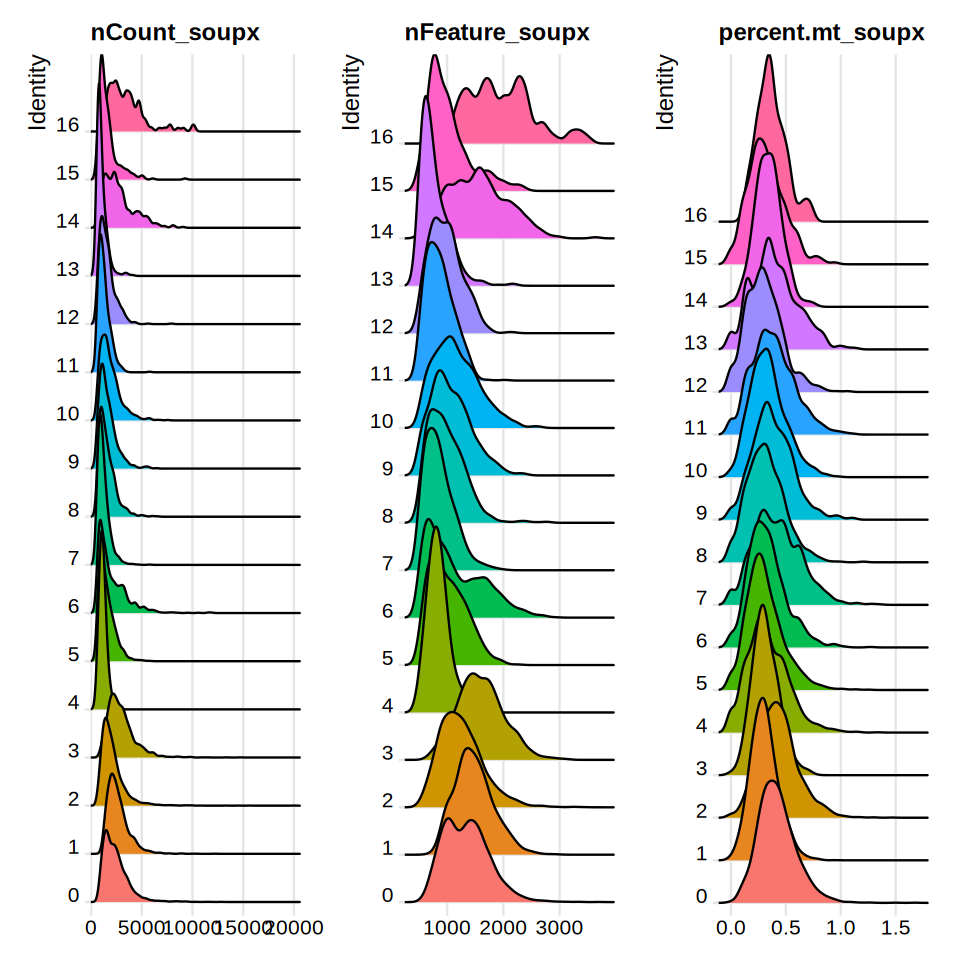

In [24]:
RidgePlot(sobj, features = c("nCount_soupx", "nFeature_soupx", "percent.mt_soupx"), group.by = "soupx_snn_res.0.5")

Cell cycle phases seems to drive a little bit the clustering across cell types. 
We might and to repress this parameter during integration 

## Processing check

Warning message:
“Removing 20551 cells missing data for features requested”
Warning message:
“The following keyed vars could not be found in object ‘soupx’:soupx_snn_res.0.6
Attempting to pull from other locations”
Warning message:
“The following requested variables were not found: soupx_snn_res.0.6”


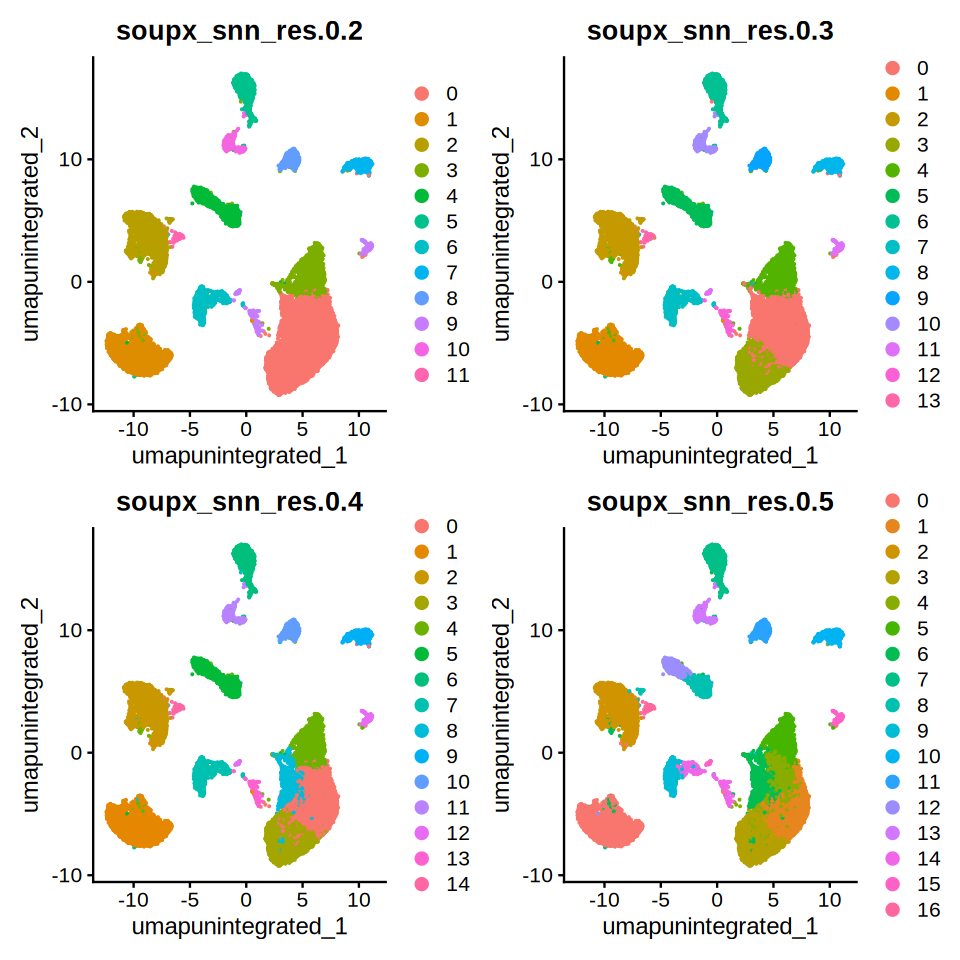

In [26]:
# Look at the clustering 
DimPlot(sobj, reduction = "umap.unintegrated", 
        group.by = c("soupx_snn_res.0.2", "soupx_snn_res.0.3", "soupx_snn_res.0.4", "soupx_snn_res.0.5", "soupx_snn_res.0.6"))

In [28]:
# Set the clsutering of interest as ident 
Idents(sobj) = sobj$soupx_snn_res.0.2

## Saving the unintegrated object per species 


In [32]:
# Save clean object by species
species = MousePseudopregnancy
saveRDS(sobj, file = paste0("../../../results/snRNA-seq/seuratobject/", species, "_post_QC.rds"))

In [2]:
sessionInfo()

R version 4.3.0 (2023-04-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.8 (Ootpa)

Matrix products: default
BLAS/LAPACK: /opt/gensoft/lib/OpenBLAS/0.3.21/lib/libopenblas_zenp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Paris
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] optparse_1.7.3        DoubletFinder_2.0.4   SoupX_1.6.2          
 [4] leiden_0.4.3.1        reticulate_1.39.0     ggpubr_0.6.0         
 [7] lubridate_1.9.3       forcats_1.0.0         stringr_1.5.1      